# Clean and Analyze Employee Exit Surveys

## Introduction

In this project, we are going to work with 2 datasets related to exit surveys from employees of the "Department of Education, Training and Employment (DETE)" and "Technical and Further Education (TAFE)" intitute, both from Queensland, Australia.

The datasets have been downloaded from the DataQuest guided project page but can also be acquired from here: [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Data Dictionary

For the DETE dataset:
- **ID**: An id used to identify the participant of the survey
- **SeparationType**: The reason why the person's employment ended
- **Cease Date**: The year or month the person's employment ended
- **DETE Start Date**: The year the person began employment with the DETE

For the TAFE dataset:
- **Record ID**: An id used to identify the participant of the survey
- **Reason for ceasing employment**: The reason why the person's employment ended
- **LengthofServiceOverall. Overall Length of Service at Institute (in years)**: The length of the person's employment (in years)

## Initializing variables and libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
dete_survey = pd.read_csv("my_datasets/dete_survey.csv")
tafe_survey = pd.read_csv("my_datasets/tafe_survey.csv")

In [3]:
#Let's explore DETE dataset
print("DETE Survey information:")
print(dete_survey.info())
print("First 5 rows of DETE Survey:")
print(dete_survey.head())

DETE Survey information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null b

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
#Let's explore TAFE dataset
print("TAFE Survey information:")
print(tafe_survey.info())
print("First 5 rows of TAFE Survey:")
print(tafe_survey.head())

TAFE Survey information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                   

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Considering the fields we are going to use in this project, we can see:
- There are not null values in the DETE surveys dataset in the important 4 columns.
- There is 1 missing value in "Reason for ceasing employment" column and 106 missing values in "LengthofServiceOverall. Overall Length of Service at Institute (in years)" column from TAFE surveys dataset.

## Defining NaN values

After taking a look, we can see that dete_survey has many "Not Stated". This string means that the value is missing but it is actually a string, not a NaN.

We can recall the read_csv function adding the parameter na_values="Not Stated" so that we will see a NaN instead of "Not Stated".

In [7]:
dete_survey = pd.read_csv("my_datasets/dete_survey.csv", na_values="Not Stated")

## Dropping columns

Now it's time to drop unneeded columns. We have seen in the "Dictionary" section the most important fields. However, we will remove:
- Columns from 28 to 48 in dete_survey
- Columns from 17 to 65 in tafe_survey

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:65], axis=1)

So now we have 2 new variables with less columns which include relevant information for our analysis.

## Renaming columns before merging
For dete_survey_updated we want to:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [9]:
#Check initial status
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [10]:
new_columns = dete_survey_updated.columns.str.strip().str.replace(" ","_").str.lower()

In [11]:
dete_survey_updated.columns = new_columns
#Check the result
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


For the tafe_survey_updated we will directly use the DataFrame.rename() method to modify the column names:
- **'Record ID'**: 'id'
- **'CESSATION YEAR'**: 'cease_date'
- **'Reason for ceasing employment'**: 'separationtype'
- **'Gender. What is your Gender?'**: 'gender'
- **'CurrentAge. Current Age'**: 'age'
- **'Employment Type. Employment Type'**: 'employment_status'
- **'Classification. Classification'**: 'position'
- **'LengthofServiceOverall. Overall Length of Service at Institute (in years)'**: 'institute_service'

In [12]:
new_names = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
}

tafe_survey_updated = tafe_survey_updated.rename(new_names, axis=1)

In [13]:
#Check of the first 5 lines in dete_survey_updated
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
#Check of the first 5 lines in tafe_survey_updated
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Travel,-,-,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,NONE,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


After these modifications, our most relevant columns have the same name in both dataframes. This will ease the later merging.

## Filtering data
We want to answer the question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

For that reason, we are going to study the employees who decided to resign. That means that "separationtype" column text contains the string "Resignation".

Let's first check the different values found in "separationtype" in both datasets:

In [15]:
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [17]:
#In order to later call the contains method, we cannot have a NaN value:
tafe_survey_updated[tafe_survey_updated["separationtype"].isnull()] = "-"
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
-                             1
Name: separationtype, dtype: int64

**Observations**:

In case of dete_survey_update, there are 3 options for resignation that we must consider.

In [18]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation")].copy()

## Verifying Data

For example, let's have a look at the the dates column: "**cease_date**" and "**dete_start_date**". We can perform a quick test to check if they make sense:
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

Let's first check the cease_date:

In [19]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [20]:
#Extracting years as number
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype("float")

Now let's take a look at the values:
- in the "**cease_date**" and "**dete_start_date**" columns in **dete_resignations**.
- in the "**cease_date**" column in **tafe_resignations**.

In [21]:
# cease date in dete_resignations
dete_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

In [22]:
# dete start date in dete_resignations
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64

In [23]:
# cease date in tafe_resignations
tafe_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

**Observations**:

After taking a look at the results, we don't see any strange date.

## Creating a new column

In order to determine if an employee stayed short or long in the company, we need a new column in dete_resignations with the substract between start and end date.

On the other hand, tafe_resignations already has a field for it called "institute_service".

For that reason, the new column in dete_resignations will also be called "institute_service".

In [24]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0


We can see that the new column "institute_service" has been added with the time spent in DETE in years.

## Identifying dissatisfied employees

We are now going to look for the employees who resign for dissatisfaction. In order to do that, there are some columns that will be checked in each dataframe.

For tafe_resignation:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

For dete_resignation:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

First of all, we are going to check the values in the tafe columns before converting them to boolean:

In [25]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We need to update the values to "True", "False" or keep the "NaN". We can create function called "update_vals" and apply it to different columns with the dataframe method "applymap()".

In [26]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

In [27]:
#Checking the results:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Let's create now a boolean column in both dataframes called "dissatisfied" using the method "any()", which looks into the dissatisfaction columns for a "True" value.

In [28]:
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)
#To avoid SettingWithCopy Warning we create a copy of the dataframe:
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [29]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
#To avoid SettingWithCopy Warning we create a copy of the dataframe:
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


After these modifications we gathered all the columns refering to a resignation due to dissatisfaction to a single columns. Now it is simpler to analyse the data and answer questions regarding dissatisfied employees.

## Combining Data

Let's combine the two dataframes for the analysis. Before merging them we can create a column called "institute" to later differentiate the origin of the row:

In [30]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [31]:
print("Dimensions of dete_resignations_up:",dete_resignations_up.shape)
print("Dimensions of tafe_resignations_up:",tafe_resignations_up.shape)

Dimensions of dete_resignations_up: (311, 38)
Dimensions of tafe_resignations_up: (340, 26)


In [32]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True, sort=False)
print("Dimensions of combined:",combined.shape)

Dimensions of combined: (651, 54)


Let's check the not-null values in the columns:

In [33]:
combined.notnull().sum().sort_values()

torres_strait                                                                     0
south_sea                                                                         3
aboriginal                                                                        7
disability                                                                        8
nesb                                                                              9
business_unit                                                                    32
classification                                                                  161
region                                                                          265
role_start_date                                                                 271
Workplace. Topic:Would you recommend the Institute as an employer to others?    282
dete_start_date                                                                 283
LengthofServiceCurrent. Length of Service at current workplace (in years)   

There are a lot columns with missing values. Let's drop the ones that have less than 500 non-null values:

In [34]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()
#Check the result:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

After the last cleaning, we have a dataframe with 651 rows and 10 columns. However, we can see there are still some missing values in specific rows. We must evaluate if we drop the lines or fill them with a specific value.

## Cleaning Service Column

Before continuing, we should take a look at the "institute_service" column:

In [35]:
combined_updated["institute_service"].value_counts(dropna=False).head(10)

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
0.0                 20
Name: institute_service, dtype: int64

We can see that values that came from DETE are float numbers while the ones that came from TAFE are strings indicating ranges. We must clean this column in order to work with the data.

Our new ranges will be:
- **New**: Less than 3 years at a company
- **Experienced**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company

Let's categorize this column. We first need to convert everything to string and extract the numbers we are interested in before converting them back to float:

In [36]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service"] = combined_updated["institute_service"].astype("float")
combined_updated["institute_service"].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

We can now create a function to categorize the column using the float numbers and apply it to create a new column called "service_cat"

In [37]:
def categorize_values(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return "Veteran"
    elif val >= 7:
        return "Established"
    elif val >= 3:
        return "Experienced"
    else:
        return "New"
    
combined_updated["service_cat"] = combined_updated["institute_service"].apply(categorize_values)
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Performing Initial Analysis

Before the analysis, let's check the dissatisfied people in the dataframe:

In [38]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In order not to work with NaN, we can use the fillna() method to convert them to the most common value: False

In [39]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Let's calculate the pivot table considering "dissatisfied" and "service_cat":

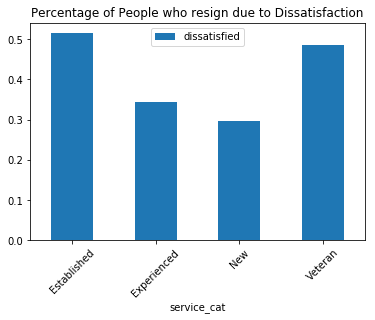

In [40]:
percentage_table = combined_updated.pivot_table(values="dissatisfied", index="service_cat")
percentage_table.plot(kind="bar", rot=45, title="Percentage of People who resign due to Dissatisfaction")

According to the graph:
- Dissatisfaction is the resignation reason almost the 50% of the times for "**Established**" and "**Veteran**" people.
- For "**Experienced**" and "**New**" people the percentage drops at around 30%.